In [22]:
from glob import glob
import os
from os.path import join
import ntpath
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
def matplotlib_setup():
    font = {'size'   : 28}
    plt.rc('font', **font)
    plt.rcParams["axes.linewidth"]  = 2.5

In [24]:
import math
def autolabel(rects, whole_cnt,SR=10):    
    SI = 100/SR
    
    offset = {'center': 0, 'right': 1, 'left': -1}
    max_height = 0
    for rect in rects:
        height = rect.get_height()
        if height > max_height:
            max_height = height
            
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.3f}%'.format((100*height/whole_cnt)/SI),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset['center']*3, 1),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha='center', va='bottom')


In [25]:
def plot_comparison(dir_names,counts,ax,y_label,whole_cnt,SR=10):
    colors = ['g','y','b','r','m','g','y','b','r','m']
    counts = counts/1000000
    whole_cnt = whole_cnt/1000000
    ind = np.arange(len(dir_names))*20
    width=15

    labels = []
    tick_labels = []
    for i,dir_name in enumerate(dir_names):
        if 'SFS' in dir_name:
            color='orange'
            label = 'SFS'
            full_name = 'SketchFlow'
        elif 'SGS' in dir_name:
            color = 'green'
            label = 'SGS'
            full_name = 'Sketch Guided'
        elif 'SRS' in dir_name:
            color = 'blue'
            label = 'RPS'
            full_name = 'Random Packet Sampling'
        elif 'FFS_(' in dir_name:
            color = 'red'
            label = 'FFS'
            full_name = 'Fast Filtered'
        elif 'whole' in dir_name or 'cicflow' in dir_name:
            color = 'gray'
            label = 'whole data'
        else:
            print('Investigate plot_comparison',dir_name)
            
        tick_labels.append(label)
        rects = ax.bar(ind[i],counts[i],label=label + ' - ' + full_name,width=width,color=color)
        autolabel(rects,whole_cnt,SR=SR)
    ax.set_xticks(ind)
    ax.set_xticklabels(dir_names,rotation=60)
    ax.set_ylabel(y_label)
    ylim= 1.6*max(counts)
    ax.set_ylim(0,ylim)    
    ax.grid(linewidth=2)
    #ax.margins(0.15)
    

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

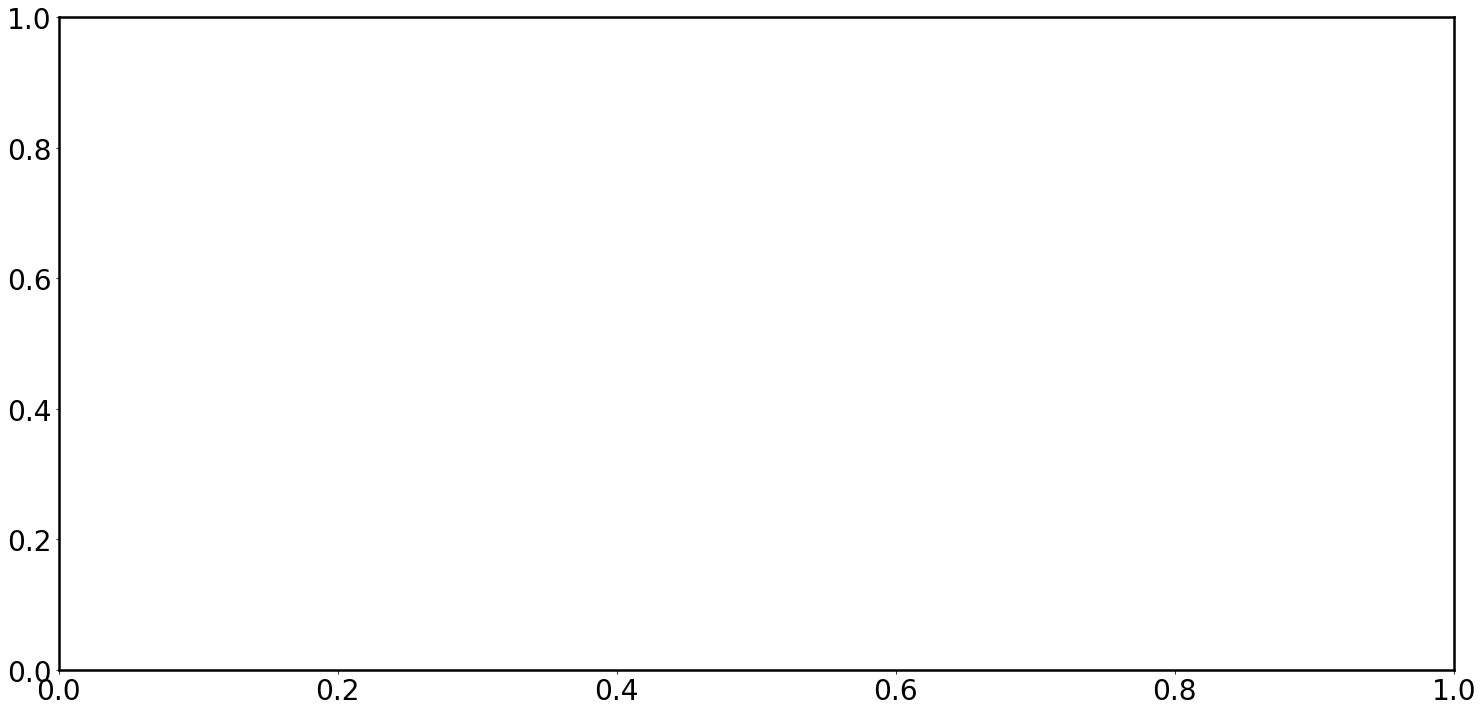

In [26]:
matplotlib_setup()
baseline_cnt = None
SR = 10
root = '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_{:.1f}'.format(SR)
cnts = []
dir_names = []
for d in sorted(glob(join(root,'*_l'))):
    dir_names.append(ntpath.basename(d))
    
    with open(join(d,'num_pkt.txt')) as f:
        cnt = int(f.readline())
        cnts.append(cnt)
        if 'SRS' in d:
            baseline_cnt = cnt
cnts = np.array(cnts)


#by packet count
plt.clf()
plt.close()
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
plot_comparison(dir_names,cnts,ax,'pkt count (M)', baseline_cnt, SR=SR)
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
#ax.legend(ncol=2,loc='upper center',bbox_to_anchor=(0.5, 1))
#ax.legend(ncol=2)
fig.tight_layout()
plt.savefig(join(root,'pkt_si_10.png'), bbox_inches='tight')

plt.show()

In [ ]:
matplotlib_setup()
baseline_cnt = None
SR = 1
root = '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/SR_{:.1f}'.format(SR)
cnts = []
dir_names = []
for d in sorted(glob(join(root,'*_l'))):
    dir_names.append(ntpath.basename(d))
    
    with open(join(d,'num_pkt.txt')) as f:
        cnt = int(f.readline())
        cnts.append(cnt)
        if 'SRS' in d:
            baseline_cnt = cnt
cnts = np.array(cnts)

#by packet count
plt.clf()
plt.close()
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
plot_comparison(dir_names,cnts,ax,'pkt count (M)', baseline_cnt, SR=SR)
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
#ax.legend(ncol=2,loc='upper center',bbox_to_anchor=(0.5, 1))
#ax.legend(ncol=2)
fig.tight_layout()
plt.savefig(join(root,'pkt_SR_{}.png'.format(SR)), bbox_inches='tight')

plt.show()

In [ ]:
matplotlib_setup()
baseline_cnt = None
SR = 0.1
root = '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_{:.1f}'.format(SR)
cnts = []
dir_names = []
for d in sorted(glob(join(root,'*_l'))):
    dir_names.append(ntpath.basename(d))
    
    with open(join(d,'num_pkt.txt')) as f:
        cnt = int(f.readline())
        cnts.append(cnt)
        if 'SRS' in d:
            baseline_cnt = cnt
cnts = np.array(cnts)

#by packet count
plt.clf()
plt.close()
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
plot_comparison(dir_names,cnts,ax,'pkt count (M)', baseline_cnt, SR=SR)
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
#ax.legend(ncol=2,loc='upper center',bbox_to_anchor=(0.5, 1))
#ax.legend(ncol=2)
fig.tight_layout()
plt.savefig(join(root,'pkt_SR_{}.png'.format(SR)), bbox_inches='tight')

plt.show()